In [ ]:
#Task 1 Lab 4
!pip install geopandas
import geopandas as gpd

In [2]:
Cal_house_shp = gpd.read_file("california_housing.shp")

In [ ]:
Cal_house_shp.head(10)

In [ ]:
Cal_house_shp["x"] = Cal_house_shp["geometry"].x
Cal_house_shp["y"] = Cal_house_shp["geometry"].y
Cal_house_shp.head()

In [ ]:
!pip install folium
import folium as fol
from folium import Marker

In [6]:
Cal_500 = Cal_house_shp.head(500)

In [ ]:
m_1 = fol.Map(location=[37.88,-122.23], tiles="openstreetmap", zoom_start=12)
for idx, row in Cal_500.iterrows():
    Marker([row['y'], row['x']]).add_to(m_1)
m_1

In [ ]:
#Task 2(1) Lab 4
Cal_house_shp.hist(bins=50, figsize=(20,15))

In [9]:
house_clean = Cal_house_shp[Cal_house_shp["house_age"]<52]

In [10]:
house_clean = house_clean[house_clean["median_val"]<500001]

In [ ]:
#Task 2(2) Lab 4
house_clean['ocean_prox'].unique()

In [12]:
import pandas as pd
house_clean = pd.get_dummies(house_clean)

In [ ]:
#Task 3 Lab 4
training_data = house_clean.sample(frac=0.8, random_state=42)
test_data = house_clean.drop(training_data.index)
training_data.head()

In [14]:
training_X = training_data[["total_room","total_bedr","population","households","median_inc","house_age","x","y","ocean_prox_<1H OCEAN","ocean_prox_INLAND","ocean_prox_ISLAND","ocean_prox_NEAR BAY","ocean_prox_NEAR OCEAN" ]]
training_Y = training_data["median_val"]

In [ ]:
training_X.head()

In [16]:
test_X = test_data[["total_room","total_bedr","population","households","median_inc","house_age","x","y","ocean_prox_<1H OCEAN","ocean_prox_INLAND","ocean_prox_ISLAND","ocean_prox_NEAR BAY","ocean_prox_NEAR OCEAN" ]]
test_Y = test_data["median_val"]

In [17]:
def standardize_data (data, stats):
  return (data - stats['mean'])/stats['std']

In [ ]:
training_stats = training_X.describe().transpose()
training_stats

In [19]:
training_X_std = standardize_data(training_X, training_stats)

In [20]:
test_X_std = standardize_data(test_X, training_stats)

In [21]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(training_X_std, training_Y)

In [23]:
test_y_pred = linear_model.predict(test_X_std)

In [ ]:
test_y_pred[0]

In [ ]:
test_Y[0:1]

In [26]:
#Task 4 Lab 4
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(test_Y, test_y_pred)
plt.xlabel("observed values")
plt.ylabel("predicted values")
plt.xlim([0,500000])
plt.ylim([0,500000])
plt.plot([0,500000], [0,500000], "r--")

In [28]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = mean_squared_error(test_Y, test_y_pred, squared=False)
rmse

In [ ]:
#Final Assignment
#Task 1

In [ ]:
##Already executed in Task 1 Lab 4
#Cal_house_shp["x"] = Cal_house_shp["geometry"].x
#Cal_house_shp["y"] = Cal_house_shp["geometry"].y
#Cal_house_shp.head()

In [ ]:
#Final Assignment
#Task 2

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest_reg = RandomForestRegressor(min_samples_leaf=10, random_state=42)

In [ ]:
forest_reg.fit(training_X, training_Y)

In [ ]:
#Final Assignment
#Task 3

In [33]:
import numpy as np

In [34]:
from sklearn.model_selection import KFold

In [35]:
from sklearn.metrics import mean_squared_error

In [ ]:
#First

In [ ]:
kf1 = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
kf1.get_n_splits(training_X)

In [ ]:
for train, test in kf1.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]


In [ ]:
forest_reg.fit(X_train, Y_train)

In [ ]:
Y_Pred = forest_reg.predict(X_test)

In [ ]:
rmse1 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Second

In [ ]:
kf2 = KFold(n_splits=10, shuffle=True, random_state=41)
kf2.get_n_splits(training_X)

In [ ]:
for train, test in kf2.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse2 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Third

In [ ]:
kf3 = KFold(n_splits=10, shuffle=True, random_state=40)
kf3.get_n_splits(training_X)

In [ ]:
for train, test in kf3.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse3 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Fourth

In [ ]:
kf4 = KFold(n_splits=10, shuffle=True, random_state=39)
kf4.get_n_splits(training_X)

In [ ]:
for train, test in kf4.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse4 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Fifth

In [ ]:
kf5 = KFold(n_splits=10, shuffle=True, random_state=38)
kf5.get_n_splits(training_X)

In [ ]:
for train, test in kf5.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse5 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Sixth

In [ ]:
kf6 = KFold(n_splits=10, shuffle=True, random_state=37)
kf6.get_n_splits(training_X)

In [ ]:
for train, test in kf6.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse6 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Seventh

In [ ]:
kf7 = KFold(n_splits=10, shuffle=True, random_state=36)
kf7.get_n_splits(training_X)

In [ ]:
for train, test in kf7.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse7 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Eighth

In [ ]:
kf8 = KFold(n_splits=10, shuffle=True, random_state=35)
kf8.get_n_splits(training_X)

In [ ]:
for train, test in kf8.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse8 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Nineth

In [ ]:
kf9 = KFold(n_splits=10, shuffle=True, random_state=34)
kf9.get_n_splits(training_X)

In [ ]:
for train, test in kf9.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse9 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
#Tenth

In [ ]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=33)
kf10.get_n_splits(training_X)

In [ ]:
for train, test in kf10.split(training_X):
  X_train, X_test = training_X[train], training_X[test]
  Y_train, Y_test = training_Y[train], training_Y[test]

In [ ]:
forest_reg.fit(X_train, Y_train)
Y_Pred = forest_reg.predict(X_test)
rmse10 = mean_squared_error(Y_test, Y_pred,squared=False)

In [ ]:
overall_rmse = (rmse1+rmse2+rmse3+rmse4+rmse5+rmse6+rmse7+rmse8+rmse9+rmse10)/10
overall_rmse

In [ ]:
#Final Assignment
#Task 4

In [36]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'n_estimators': [80, 100, 120]}

In [40]:
grid_search = GridSearchCV(estimator = forest_reg, param_grid = param_grid)

In [41]:
grid_search.fit(training_X,training_Y)

GridSearchCV(estimator=RandomForestRegressor(min_samples_leaf=10,
                                             random_state=42),
             param_grid={'n_estimators': [80, 100, 120]})

In [42]:
grid_search.best_params_

{'n_estimators': 120}

In [44]:
forest_reg2 = RandomForestRegressor(min_samples_leaf=10, random_state=42, n_estimators =120)

In [45]:
forest_reg2.fit(training_X, training_Y)

RandomForestRegressor(min_samples_leaf=10, n_estimators=120, random_state=42)

In [46]:
prediction_Y = forest_reg.predict(test_X)

In [48]:
rmse_reg2 = mean_squared_error(test_Y, prediction_Y,squared=False)
rmse_reg2

43516.934018726744

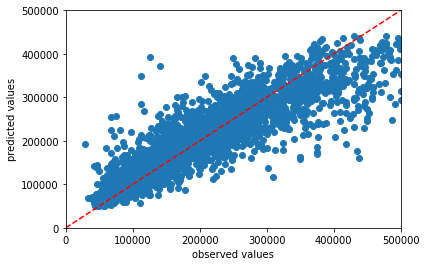

In [49]:
plt.scatter(test_Y, prediction_Y)
plt.xlabel("observed values")
plt.ylabel("predicted values")
plt.xlim([0,500000])
plt.ylim([0,500000])
plt.plot([0,500000], [0,500000], "r--")